In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc
%matplotlib inline

In [2]:
values = np.array([0.0459,0.0436,0.0207,0.0867,0.1678,0.1748])

In [5]:
#muの事前分布
mu = pymc.Normal('mu',mu=0,tau=1/(0.1)**2)
#sigmaの事前分布
sigma = pymc.InverseGamma('sigma',alpha=16,beta=0.68)

In [6]:
profit = pymc.Normal('profit',mu=mu,tau=(1/sigma),observed=True,value=values)

In [7]:
model = pymc.Model([mu,sigma,profit])

In [8]:
mygraph = pymc.graph.graph(model)

In [9]:
mygraph.write_png('graph.png')

True

(-0.5, 455.5, 303.5, -0.5)

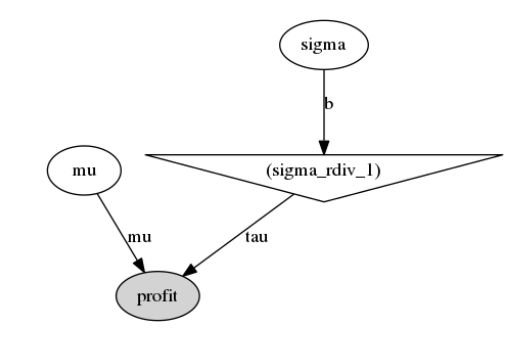

In [10]:
from PIL import Image

im = Image.open('graph.png')
plt.imshow(im)
plt.axis('off')

In [20]:
M = pymc.MCMC(model)

/home/kyohei/anaconda2/lib/python2.7/site-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


In [24]:
M.sample(iter=100000,burn=1000,thin=10)

 [-----------------100%-----------------] 100000 of 100000 complete in 13.4 sec

Plotting mu
Plotting sigma


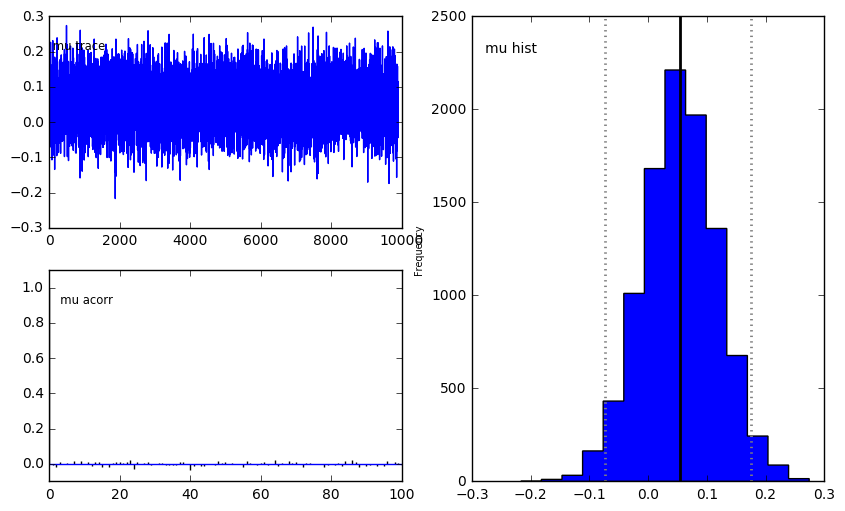

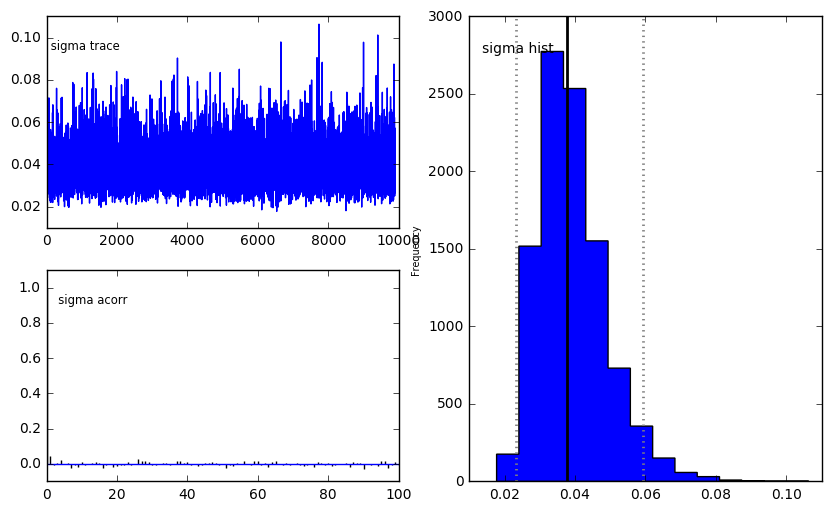

In [25]:
pymc.Matplot.plot(M)

In [32]:
M.summary()


mu:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.055            0.063            0.001            [-0.074  0.175]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.071           0.013           0.055          0.097         0.18
	

sigma:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.039            0.01             0.0              [ 0.023  0.059]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.025            0.032           0.038          0.044         0.062
	


In [34]:
np.sqrt(0.059)*100

24.289915602982237